# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")
display(df.head(3))

Loaded 103,559 records with features


,Station Name,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,...,pressure_diff_1h,pressure_trend,wet_temp_rolling_7h,wet_temp_rolling_24h,humidity_rolling_7h,humidity_rolling_24h,rain_intensity_rolling_7h,rain_intensity_rolling_24h,pressure_rolling_7h,pressure_rolling_24h
Measurement Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-25 09:00:00,63rd Street Weather Station,7.0,5.9,86,7.2,5.0,5.2,60.0,119,5.1,...,NaN,NaN,5.900000,5.900000,86.000000,86.000000,7.2,7.2,986.1,986.1
2015-04-30 05:00:00,63rd Street Weather Station,6.1,4.3,76,0.0,0.0,2.5,0.0,11,7.2,...,3.8,rising,5.100000,5.100000,81.000000,81.000000,3.6,3.6,988.0,988.0
2015-05-22 15:00:00,Oak Street Weather Station,20.8,7.0,55,0.0,0.0,1.4,0.0,63,1.9,...,-1.0,falling,5.733333,5.733333,72.333333,72.333333,2.4,2.4,988.3,988.3


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


## Start of Pattern Analysis

In [ ]:
# Set datetime index for time-based operations
df_ts = df.copy().sort_index()

# Adopted from Lecture 11 demo
# Correlation analysis
numeric_features = ['Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 
                    'Interval Rain', 'Total Rain', 'Wind Speed', 'Barometric Pressure', 'Solar Radiation']

corr_matrix = df_ts[numeric_features].corr()

# Identify strongest correlations
print("🔗 Strongest Correlations (|r| > 0.5)")

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_list = "\n".join([f"- {feat1} ↔ {feat2}: `{corr:.3f}`"
                       for feat1, feat2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)])
print(corr_list)

# Save correlation matrix to csv
corr_matrix.to_csv('output/q5_correlations.csv')

🔗 Strongest Correlations (|r| > 0.5)
- Air Temperature ↔ Wet Bulb Temperature: `0.982`


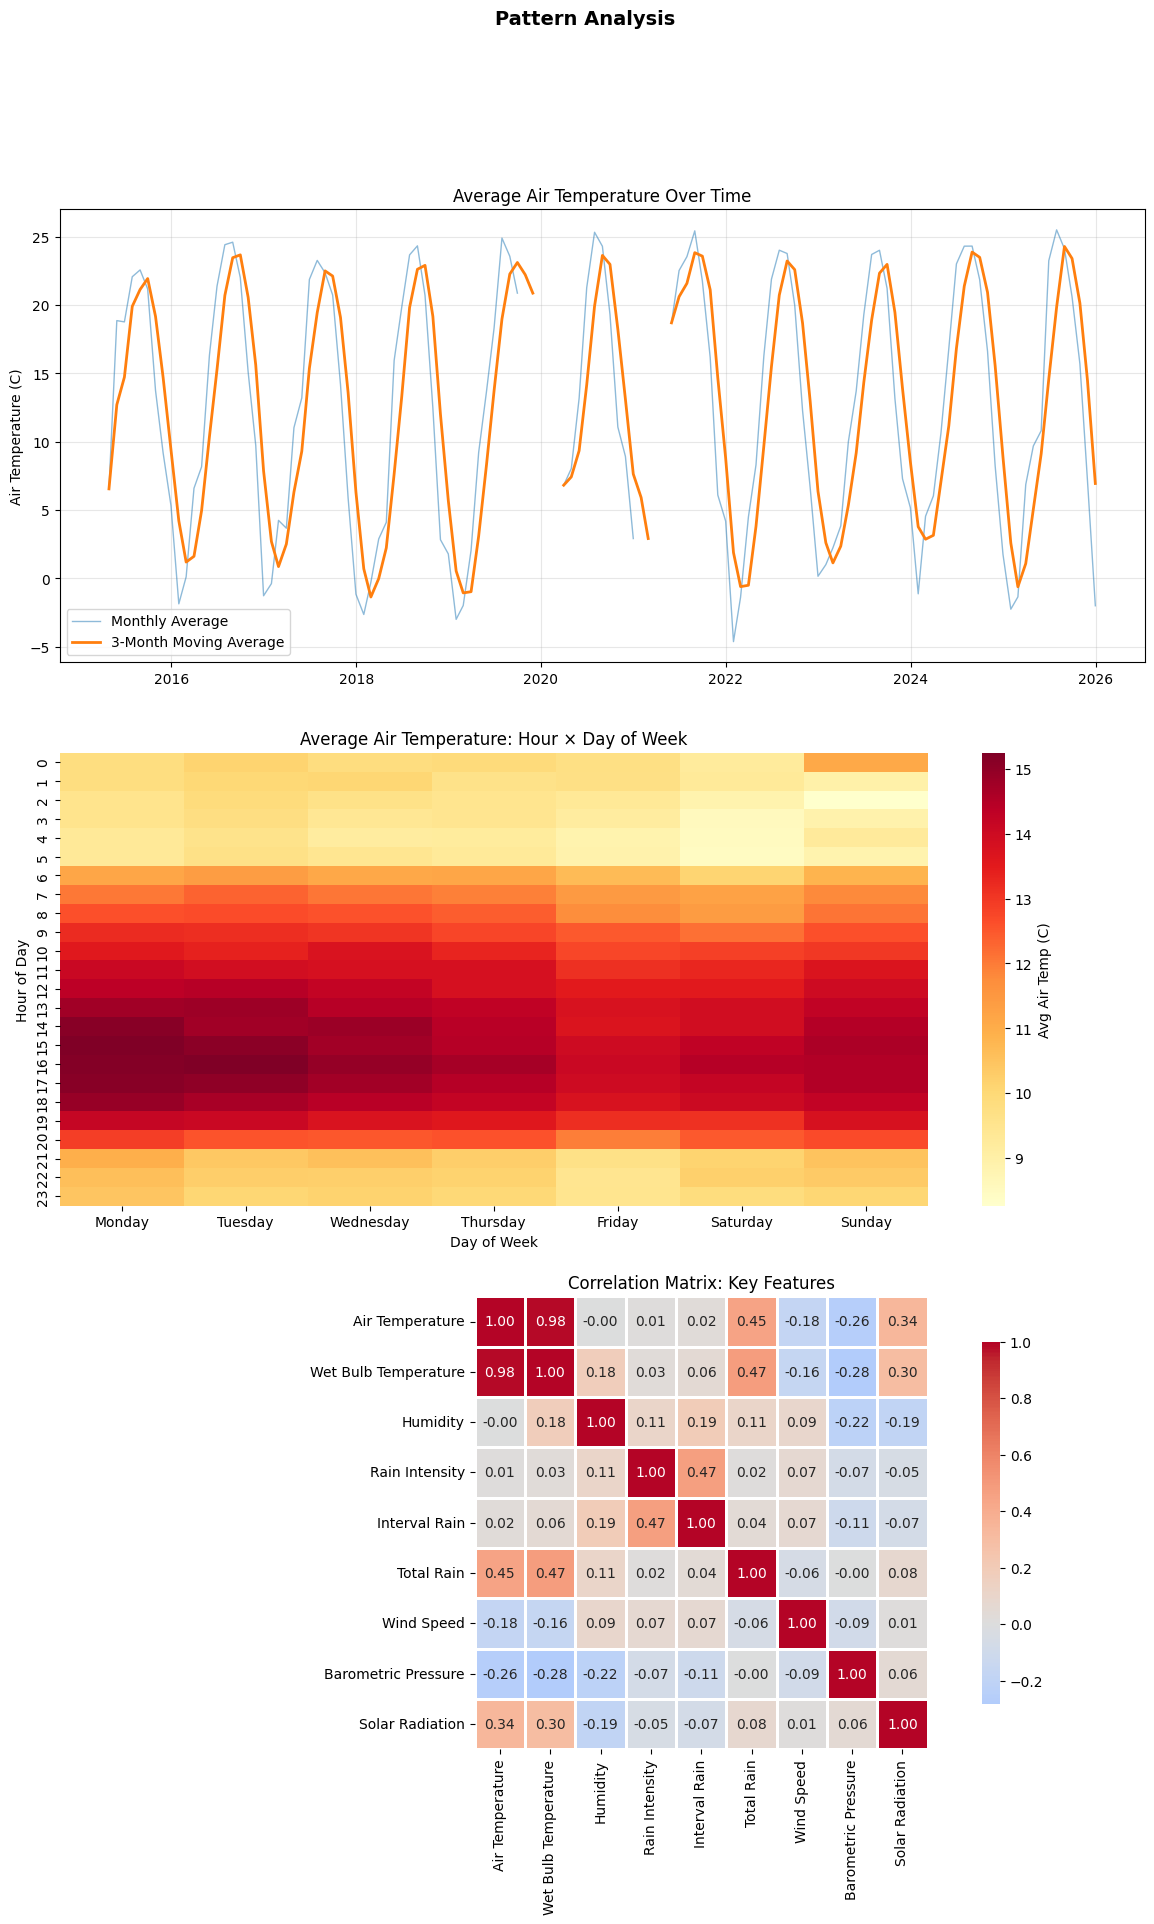

In [3]:
# Trend Analysis
# Resample to daily for trend analysis
monthly = df_ts.resample('ME').agg({
    'Air Temperature': 'mean'
})

# Calculate moving averages for trend detection
monthly['air_temp_3m_ma'] = monthly['Air Temperature'].rolling(window=3, min_periods=1).mean()

# Visualize trends
fig, axes = plt.subplots(3, 1, figsize=(14, 20))
fig.suptitle('Pattern Analysis', fontsize=14, fontweight='bold')

# Average air temperature over time
axes[0].plot(monthly.index, monthly['Air Temperature'], alpha=0.5, label='Monthly Average', linewidth=1)
axes[0].plot(monthly.index, monthly['air_temp_3m_ma'], label='3-Month Moving Average', linewidth=2)
axes[0].set_title('Average Air Temperature Over Time')
axes[0].set_ylabel('Air Temperature (C)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Analyze patterns by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_by_dow = df_ts.groupby('day_name')['Air Temperature'].agg(['mean', 'std', 'count']).reindex(day_order)

# Hourly pattern (heatmap by day of week); adopted from Lecture 11 demo
hourly_dow = df_ts.groupby(['day_name', 'hour'])['Air Temperature'].mean().unstack(level=0).reindex(columns=day_order)
sns.heatmap(hourly_dow, annot=False, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Avg Air Temp (C)'})
axes[1].set_title('Average Air Temperature: Hour × Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Hour of Day')

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[2])
axes[2].set_title('Correlation Matrix: Key Features')

plt.savefig('output/q5_patterns.png', dpi=150, bbox_inches='tight')

In [ ]:
# Trend Summary